<a href="https://colab.research.google.com/github/wildanardani/TextureWildan/blob/main/Moch_Wildan_Ardani_Texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import cv2: Ini mengimpor pustaka OpenCV, yang digunakan untuk operasi pengolahan citra.

import numpy as np: Ini mengimpor pustaka NumPy, yang digunakan untuk manipulasi array numerik dalam Python.

import matplotlib.pyplot as plt: Ini mengimpor pustaka Matplotlib, yang digunakan untuk visualisasi data, termasuk citra.

import glob: Ini mengimpor pustaka glob, yang digunakan untuk mencocokkan jalur dan nama berkas.

from skimage.color import rgb2gray: Ini mengimpor fungsi rgb2gray dari pustaka skimage.color, yang digunakan untuk mengubah citra berwarna menjadi citra grayscale.

from skimage.feature import local_binary_pattern: Ini mengimpor fungsi local_binary_pattern dari pustaka skimage.feature, yang digunakan untuk menghitung pola biner lokal (Local Binary Pattern/LBP) dari citra.




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

def load_image(arr): Ini adalah deklarasi fungsi dengan nama load_image yang menerima satu parameter, yaitu array arr.

strr = "Dataset/*.jpg": Variabel strr berisi string yang berfungsi sebagai pola pencarian berkas menggunakan modul glob. String tersebut menyatakan bahwa kita ingin mencocokkan berkas dengan ekstensi .jpg di dalam direktori yang bernama "Dataset". Tanda asterisk (*) digunakan sebagai wildcard untuk mencocokkan semua nama berkas dengan ekstensi .jpg.

for file in glob.glob(strr):: Ini adalah loop for yang akan beriterasi melalui semua berkas yang cocok dengan pola pencarian yang didefinisikan dalam variabel strr.

img=np.asarray(plt.imread(file)): Pada setiap iterasi, citra dibaca menggunakan plt.imread(file) dari pustaka Matplotlib, dan hasilnya dikonversi menjadi array NumPy menggunakan np.asarray(). Hasil akhir adalah representasi citra dalam bentuk array.

arr.append(img): Array citra yang dikonversi ditambahkan ke array arr yang diberikan sebagai parameter fungsi.

return arr: Setelah proses membaca dan menyimpan citra selesai, fungsi mengembalikan array arr yang berisi semua citra yang telah dibaca.

In [ ]:
def load_image(arr):
    strr = "Dataset/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

arr_prep=[]: Ini adalah pembuatan variabel arr_prep, yang akan digunakan untuk menyimpan hasil preprocessing dari setiap gambar.

for i in range(np.shape(arr)[0]):: Loop for akan berjalan sebanyak jumlah elemen dalam arr (jumlah gambar).

img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY): Pada setiap iterasi loop, fungsi cv2.cvtColor digunakan untuk mengubah format warna gambar dari BGR menjadi GRAY. Pergantian format warna ini akan mengubah gambar berwarna menjadi gambar skala abu-abu (grayscale). Gambar skala abu-abu hanya memiliki satu saluran warna (intensitas) daripada tiga saluran warna seperti pada gambar berwarna.

arr_prep.append(img): Gambar yang telah diubah menjadi skala abu-abu (grayscale) ditambahkan ke dalam daftar arr_prep.

Setelah loop selesai berjalan untuk semua gambar dalam arr, fungsi akan mengembalikan arr_prep, yang berisi daftar gambar yang sudah di-preprocessing menjadi skala abu-abu.

In [ ]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

lbp = local_binary_pattern(img, 24, 3, method="uniform"): Fungsi local_binary_pattern digunakan untuk menghitung Local Binary Pattern dari citra img. LBP adalah metode untuk mengekstraksi fitur tekstur dari citra dengan cara membandingkan intensitas piksel tetangga dengan piksel pusatnya. Parameter yang digunakan dalam fungsi ini adalah:

img: Citra input untuk diekstraksi LBP.
24: Jumlah bit dalam representasi LBP. Ini menentukan jumlah tetangga yang akan dibandingkan.
3: Jumlah tetangga yang digunakan untuk menghitung LBP. Di sini, menggunakan tetangga dengan jarak Euclidean 3.
method="uniform": Parameter ini menentukan jenis metode LBP yang digunakan. Dalam hal ini, menggunakan metode uniform yang memetakan semua non-uniform LBP menjadi satu nilai, sehingga mengurangi dimensi histogram.
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26)): Fungsi np.histogram digunakan untuk menghitung histogram dari array lbp. Histogram akan menghitung frekuensi kemunculan setiap nilai dalam array. Parameter yang digunakan dalam fungsi ini adalah:

lbp.ravel(): Array LBP yang di-ravel (dijadikan 1 dimensi) agar sesuai dengan input yang diperlukan oleh np.histogram.
bins=np.arange(0, 27): Rentang nilai untuk membentuk interval dalam histogram. Di sini, interval adalah 0 hingga 26, sehingga ada 27 interval.
range=(0, 26): Rentang nilai dari data yang akan dihitung histogramnya.
hist = hist.astype("float"): Mengubah tipe data histogram menjadi float. Ini diperlukan karena akan ada pembagian (normalisasi) pada langkah selanjutnya.

hist /= (hist.sum() + (1e-7)): Normalisasi histogram. Setiap nilai dalam histogram dibagi dengan jumlah seluruh elemen histogram ditambahkan dengan nilai yang sangat kecil (1e-7) untuk menghindari pembagian oleh nol jika terdapat nilai histogram yang nol.

return lbp, hist: Mengembalikan hasil ekstraksi LBP dan histogram LBP.

In [ ]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

arr_feature=[] dan vector_feature=[]: Dua variabel list kosong digunakan untuk menyimpan hasil ekstraksi fitur.

for i in range(np.shape(arr)[0]):: Ini adalah loop for yang akan mengiterasi melalui setiap elemen dalam array arr.

lb, vektor = extractLBP(arr[i]): Pada setiap iterasi, fungsi extractLBP dipanggil dengan elemen saat ini dari array arr sebagai argumen. Fungsi ini tampaknya telah didefinisikan di tempat lain dalam kode atau merupakan bagian dari pustaka yang digunakan. extractLBP berfungsi untuk melakukan Local Binary Pattern (LBP) extraction (ekstraksi pola biner lokal) pada input dan mengembalikan dua nilai: lb dan vektor.

arr_feature.append(lb): Hasil lb dari ekstraksi fitur ditambahkan ke dalam arr_feature, sehingga kita akan memiliki daftar fitur LBP untuk setiap elemen dalam array arr.

vector_feature.append(vektor): Hasil vektor dari ekstraksi fitur ditambahkan ke dalam vector_feature, sehingga kita akan memiliki daftar vektor fitur untuk setiap elemen dalam array arr.

Setelah selesai mengiterasi melalui semua elemen dalam array arr, fungsi akan mengembalikan dua variabel arr_feature dan vector_feature sebagai hasil ekstraksi fitur dari seluruh array input.

In [ ]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

data=[]: Pada baris pertama, variabel data didefinisikan sebagai sebuah list kosong. Ini berarti variabel ini saat ini tidak berisi data apapun.

data=load_image(data): Pada baris kedua, fungsi load_image dipanggil dengan argumen data. Fungsi ini berfungsi untuk memuat gambar ke dalam variabel data. Namun, karena implementasi lengkap dari fungsi load_image tidak diberikan dalam kode ini, tidak dapat memberikan penjelasan lebih lanjut tentang apa yang sebenarnya dilakukan oleh fungsi tersebut.

In [ ]:
data=[]
data=load_image(data)

dataPreprocessed = preprocessing(data): Pada baris ini, fungsi preprocessing dipanggil dengan argumen data. Fungsi ini bertujuan untuk melakukan pra-pemrosesan terhadap data gambar yang berada dalam variabel data.

In [ ]:
dataPreprocessed = preprocessing(data)

dataExtracted, vector = featureExtraction(dataPreprocessed): Pada baris ini, fungsi featureExtraction dipanggil dengan argumen dataPreprocessed. Fungsi ini bertujuan untuk melakukan ekstraksi fitur dari data gambar yang telah melewati tahap pra-pemrosesan sebelumnya dan tersimpan dalam variabel dataPreprocessed.
Setelah proses ekstraksi fitur dilakukan, dua nilai kembali (return values) akan dihasilkan oleh fungsi featureExtraction, yaitu:

dataExtracted: Variabel ini akan berisi hasil ekstraksi fitur dari setiap gambar dalam data. Mungkin berupa daftar atau matriks fitur tergantung pada representasi fitur yang dihasilkan oleh fungsi tersebut.
vector: Variabel ini akan berisi vektor fitur dari setiap gambar dalam data. Vektor fitur adalah representasi numerik kompak dari fitur-fitur yang telah diekstraksi dari gambar, biasanya digunakan sebagai input untuk model pembelajaran mesin atau algoritma lainnya.

In [ ]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

print('Extraction Result'): Ini hanya mencetak teks "Extraction Result" di konsol.

fig = plt.figure(figsize=(10,10)): Ini membuat objek figure baru dengan ukuran 10x10 inci.

ax1 = fig.add_subplot(4,2,1): Membuat subplot pertama (1) pada grid 4x2 dan menetapkannya ke objek ax1.

ax1.set_title('Before'): Memberikan judul "Before" untuk subplot pertama.

ax1.set_axis_off(): Menghilangkan sumbu (axis) dari subplot pertama.

ax1.imshow(data[0]): Menampilkan citra pertama dari data yang disimpan di variabel data ke dalam subplot pertama.

Langkah 3-6 di atas diulangi untuk menciptakan subplot kedua, ketiga, dan seterusnya hingga subplot keenam, masing-masing menampilkan citra "Before" dan "After" dari data yang berbeda.

plt.show(): Menampilkan keseluruhan figure yang berisi semua subplot. Tanpa baris ini, gambar tidak akan ditampilkan di layar.

Extraction Result


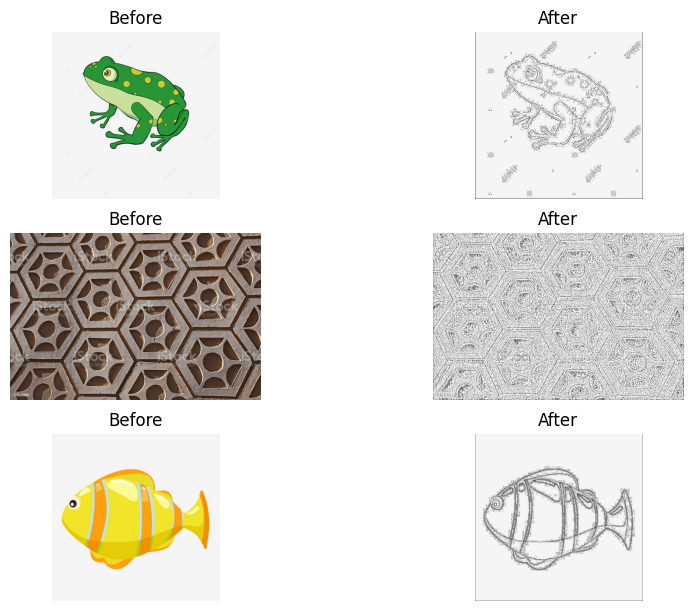

In [ ]:
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

print("Vector of Image 1 :", vector[0])
Baris ini mencetak teks "Vector of Image 1 :" diikuti oleh nilai vektor pertama dari variabel "vector". Ini diasumsikan bahwa "vector" adalah sebuah list atau array yang berisi vektor-vektor gambar. Nilai vektor gambar pertama diakses menggunakan indeks 0 karena indeks dalam Python dimulai dari 0.

print()
Baris ini mencetak baris kosong di antara setiap keluaran untuk memberikan sedikit spasi atau pemisah antara output.

print("Vector of Image 2 :", vector[1])
Baris ini mencetak teks "Vector of Image 2 :" diikuti oleh nilai vektor kedua dari variabel "vector". Kembali, diasumsikan bahwa "vector" berisi setidaknya dua vektor gambar, dan nilai vektor gambar kedua diakses menggunakan indeks 1.

print()
Baris ini mencetak baris kosong lagi sebagai pemisah.

print("Vector of Image 3 :", vector[2])
Baris ini mencetak teks "Vector of Image 3 :" diikuti oleh nilai vektor ketiga dari variabel "vector". Diasumsikan "vector" berisi setidaknya tiga vektor gambar, dan nilai vektor gambar ketiga diakses menggunakan indeks 2.

In [ ]:
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [1.63940430e-02 9.91210937e-03 3.21777344e-03 1.67480469e-03
 1.03271484e-03 1.06445312e-03 6.34765625e-04 4.58984375e-04
 3.71093750e-04 3.34472656e-04 4.15039062e-04 1.74072266e-03
 3.20068359e-03 7.22167969e-03 5.68847656e-04 7.00683594e-03
 1.45019531e-03 8.80126953e-03 2.64404297e-03 3.55712891e-03
 4.17236328e-03 6.78955078e-03 1.03979492e-02 1.30810547e-02
 7.59731445e-01 1.34125977e-01]

Vector of Image 2 : [0.07305345 0.04571113 0.01626127 0.00756514 0.00543329 0.00520452
 0.00454395 0.00526457 0.00555482 0.00675444 0.0074722  0.01119544
 0.01351888 0.01287833 0.00748507 0.00609529 0.00486994 0.00492428
 0.00439811 0.00481275 0.00568923 0.00866467 0.01749663 0.04422556
 0.07441892 0.59650811]

Vector of Image 3 : [5.21809896e-03 3.29535590e-03 2.53689236e-03 1.78710937e-03
 1.05251736e-03 8.09461806e-04 6.86848958e-04 1.08289931e-03
 1.46592882e-03 2.29817708e-03 4.30013021e-03 1.29871962e-02
 3.30143229e-02 2.23817274e-02 5.17795139e-03 8.65993924e-03
 2.7